In [1]:
import os
import re
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import h5py

from wombat.utils import listfiles

In [32]:
# !pip install enrichrpy

In [3]:
import enrichrpy.enrichr as een
import enrichrpy.plotting as epl

In [5]:
run_dir = '../analysis/brca_dcis/combined_run_1/'

In [6]:
fp = os.path.join(run_dir, 'output.h5')
f = h5py.File(fp, 'r')

In [7]:
f.keys()

<KeysViewHDF5 ['hyperparameters', 'latent_states', 'parameters', 'progress']>

In [8]:
iteration = list(f['parameters']['M'].keys())[-1]
f['parameters']['M'][iteration]

<HDF5 dataset "90": shape (11381, 20), type "<f8">

In [9]:
f['hyperparameters']

<HDF5 group "/hyperparameters" (5 members)>

In [10]:
iteration

'90'

In [11]:
metagenes = np.asarray(f['parameters']['M'][iteration])
fov_to_emb = {}
for k in f['latent_states']['XT'].keys():
    fov_to_emb[k] = np.asarray(f['latent_states']['XT'][k][iteration])

In [12]:
gene_table = pd.read_csv(os.path.join(run_dir, 'inputs', 'files', 'genes_0.txt'),
                         sep='\t', header=None, index_col=0)
gene_table.index.name = 'gene'
metagene_df = pd.DataFrame(data=metagenes, index=gene_table.index,
                         columns=[f'metagene_{i}'for i in range(metagenes.shape[1])])
metagene_df

metagene_0    metagene_1  metagene_2    metagene_3    metagene_4  \
gene                                                                          
SAMD11   3.720677e-05  2.425524e-15    0.000040  1.297108e-14  9.067685e-05   
NOC2L    5.232210e-15  6.137024e-05    0.000039  1.623243e-04  5.254697e-04   
KLHL17   1.342916e-14  1.124448e-06    0.000009  7.703483e-14  1.748685e-04   
PLEKHN1  8.433422e-15  1.125217e-06    0.000030  1.616008e-14  3.111596e-05   
HES4     2.928584e-15  2.818760e-15    0.000081  5.153963e-14  7.685672e-04   
...               ...           ...         ...           ...           ...   
CMC4     1.251107e-14  5.297739e-05    0.000060  6.636950e-14  4.721666e-15   
VBP1     7.164607e-15  8.351703e-05    0.000056  2.446704e-13  2.939531e-15   
CLIC2    4.010497e-14  2.746181e-15    0.000081  2.755690e-14  3.126108e-06   
TMLHE    1.545271e-05  8.038943e-05    0.000009  5.826908e-06  2.229632e-06   
VAMP7    3.843550e-05  6.788911e-05    0.000009  2.374495e-05  8.249901e-15   

         metagene_5  metagene_6  metagene_7    metagene_8  metagene_9  \
gene                                                                    
SAMD11     0.000003    0.000025    0.000110  1.548137e-05    0.000233   
NOC2L      0.000147    0.000146    0.000125  1.592957e-04    0.000125   
KLHL17     0.000072    0.000046    0.000025  2.661391e-15    0.000072   
PLEKHN1    0.000025    0.000021    0.000020  3.021773e-05    0.000054   
HES4       0.000248    0.000147    0.000102  1.644408e-04    0.000455   
...             ...         ...         ...           ...         ...   
CMC4       0.000085    0.000080    0.000027  5.997286e-05    0.000038   
VBP1       0.000129    0.000167    0.000067  7.307535e-05    0.000078   
CLIC2      0.000013    0.000011    0.000013  1.694586e-05    0.000012   
TMLHE      0.000018    0.000078    0.000015  8.016893e-05    0.000005   
VAMP7      0.000059    0.000110    0.000014  7.068896e-05    0.000042   

          metagene_10   metagene_11   metagene_12   metagene_13   metagene_14  \
gene                                                                            
SAMD11   1.942375e-05  3.975115e-15  2.704232e-15  3.665585e-15  9.735420e-15   
NOC2L    7.842345e-05  1.247905e-14  1.268120e-04  2.195220e-05  9.151799e-15   
KLHL17   6.548577e-05  9.454204e-15  2.790007e-05  2.827798e-05  3.060041e-13   
PLEKHN1  2.412282e-06  1.053082e-14  3.769686e-06  1.462556e-14  2.489196e-14   
HES4     1.044353e-15  3.251103e-15  9.738553e-05  5.800942e-05  5.889538e-15   
...               ...           ...           ...           ...           ...   
CMC4     7.148371e-05  2.231508e-14  2.663524e-05  3.407532e-05  2.033661e-05   
VBP1     9.274249e-05  1.431773e-14  7.938672e-05  7.652748e-05  2.751651e-14   
CLIC2    1.428498e-04  1.437026e-04  1.208759e-05  2.264575e-05  1.837909e-13   
TMLHE    2.269399e-05  4.905562e-14  1.541404e-05  2.544059e-05  3.188170e-14   
VAMP7    8.182056e-05  9.314623e-05  4.887072e-05  8.503088e-05  5.104065e-14   

          metagene_15  metagene_16   metagene_17   metagene_18   metagene_19  
gene                                                                          
SAMD11   1.088490e-05     0.000039  2.399139e-05  6.996272e-15  6.460122e-15  
NOC2L    2.033153e-04     0.000122  5.628031e-05  2.313686e-04  9.051143e-05  
KLHL17   3.822983e-15     0.000003  1.985281e-05  3.040181e-05  4.136752e-14  
PLEKHN1  1.776485e-05     0.000024  4.947320e-15  6.779097e-14  8.427953e-15  
HES4     6.255006e-04     0.000133  2.144937e-04  2.638768e-04  6.978834e-04  
...               ...          ...           ...           ...           ...  
CMC4     1.193112e-14     0.000043  4.556100e-05  6.308396e-05  7.205211e-06  
VBP1     3.409696e-15     0.000089  6.533978e-05  1.551449e-04  1.771526e-14  
CLIC2    3.492732e-06     0.000009  5.730863e-05  9.962203e-15  1.495854e-04  
TMLHE    6.185014e-06     0.000076  2.215068e-05  3.242487e-05  3.955695e-05  
VAMP7    7.277102e-15     0.000

In [13]:
fps = sorted(listfiles(os.path.join(run_dir, 'inputs', 'input_adatas')))
fps

['../analysis/brca_dcis/combined_run_1/inputs/input_adatas/BR_206B1_U1.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/BR_206B1_U2.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/BR_206B1_U3.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/BR_206B1_U4.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/BR_206B1_U5.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT308B1-S1H1.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT308B1-S1H4.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT308B1-S1H5.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT308B1-S2H5.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT323B1-S1H1.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT323B1-S1H3.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_adatas/HT339B1-S1H3_U1.h5ad',
 '../analysis/brca_dcis/combined_run_1/inputs/input_ad

In [30]:
sample_to_adata = {fp.split('/')[-1].split('.')[0]:sc.read_h5ad(fp)
                   for fp in fps}
sample_to_adata.keys()

dict_keys(['BR_206B1_U1', 'BR_206B1_U2', 'BR_206B1_U3', 'BR_206B1_U4', 'BR_206B1_U5', 'HT308B1-S1H1', 'HT308B1-S1H4', 'HT308B1-S1H5', 'HT308B1-S2H5', 'HT323B1-S1H1', 'HT323B1-S1H3', 'HT339B1-S1H3_U1', 'HT339B1-S1H3_U2', 'HT397B1-S1H2Fs4U1Bp1', 'HT397B1-S1H3Fs1U1Bp1', 'HT480B1-S1H1Fs1U1Bp1', 'HT480B1-S1H3Fs1U1Bp1', 'HT486B1-S1H1Fs1U1Bp1'])

In [31]:
directory = os.path.join(run_dir, 'result_adatas')
Path(directory).mkdir(parents=True, exist_ok=True)
for s, a in sample_to_adata.items():
    fov = str(a.obs['fov'][0])
    a.obsm['metagene_emb'] = fov_to_emb[fov]
    a.uns['metagene_df'] = metagene_df
    
    for i in range(a.obsm['metagene_emb'].shape[1]):
        a.obs[f'metagene_{i}'] = a.obsm['metagene_emb'][:, i]
    
    a.write_h5ad(os.path.join(directory, f'{s}.h5ad'))
    

In [16]:
a = next(iter(sample_to_adata.values()))
a

AnnData object with n_obs × n_vars = 3651 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'sample_id', 'fov', 'highlight'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'highlight_colors', 'spatial', 'spot_to_neighbors', 'metagene_df'
    obsm: 'spatial', 'metagene_emb'

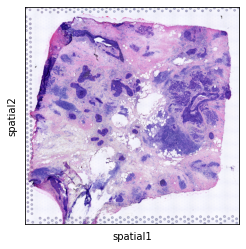

In [18]:
sc.pl.spatial(a)

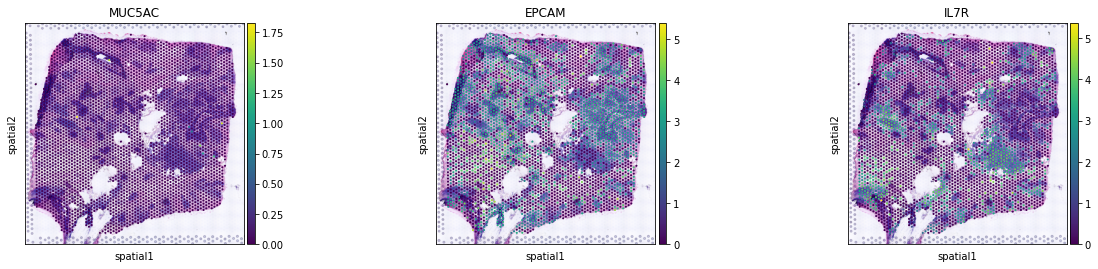

In [19]:
sc.pl.spatial(a, color=['MUC5AC', 'EPCAM', 'IL7R'])

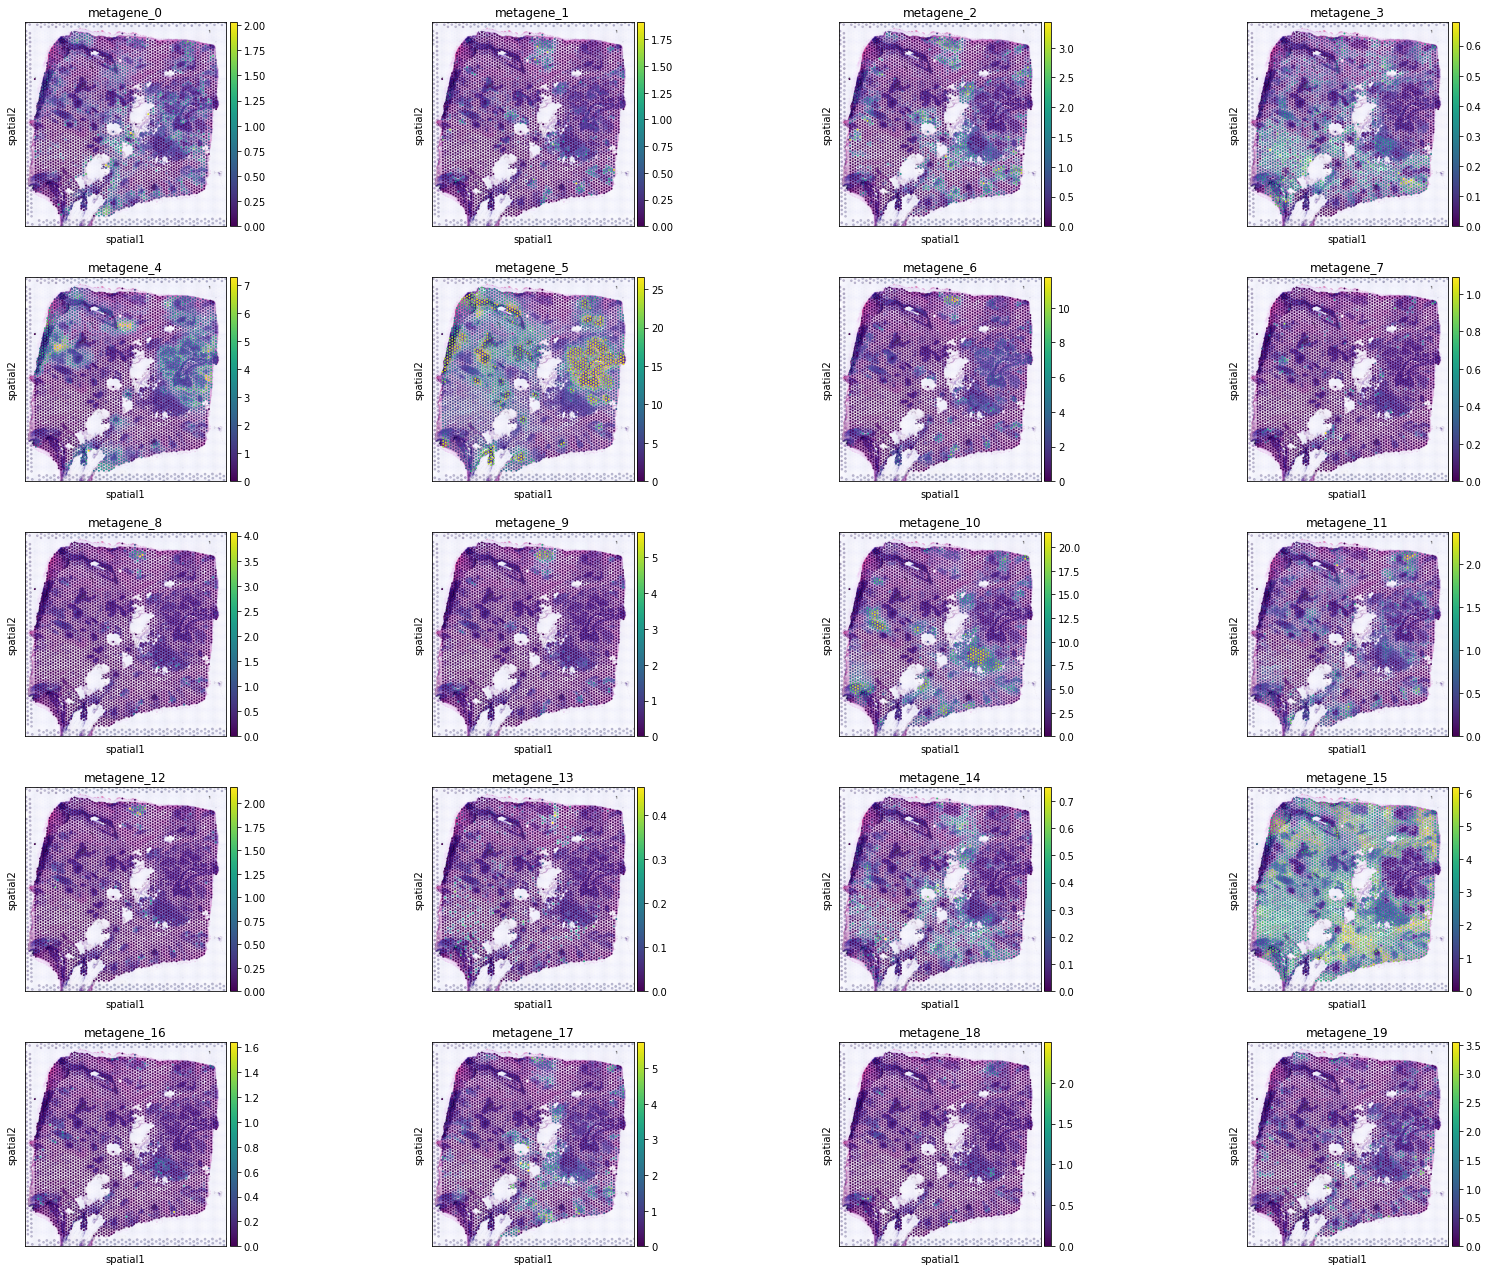

In [20]:
sc.pl.spatial(a, color=[c for c in a.obs.columns if 'metagene' in c])

In [28]:
# looking for metagenes w/ top score for a specific gene
from sklearn.preprocessing import StandardScaler
def get_top_metagenes(metagene_df, gene):
    scaler = StandardScaler(with_mean=False)
    scaled = pd.DataFrame(data=scaler.fit_transform(metagene_df.values),
                          index=metagene_df.index, columns=metagene_df.columns).transpose()
    
    if gene not in scaled.columns:
        raise RuntimeError(f'{gene} not in analysis, filtered due to sparsity across samples')
    
    return scaled.sort_values(gene, ascending=False)[gene]

In [29]:
get_top_metagenes(metagene_df, 'MGP')

metagene_3     1.854188e+01
metagene_2     9.112043e+00
metagene_1     8.815947e+00
metagene_15    7.238651e+00
metagene_17    6.712349e+00
metagene_12    6.454944e+00
metagene_6     5.860102e+00
metagene_9     5.640630e+00
metagene_13    5.583896e+00
metagene_18    4.530293e+00
metagene_0     3.877466e+00
metagene_5     3.712805e+00
metagene_14    2.659114e+00
metagene_8     2.417627e+00
metagene_19    1.816420e+00
metagene_10    1.370676e+00
metagene_11    4.818244e-11
metagene_7     1.099579e-11
metagene_4     7.813864e-12
metagene_16    4.376851e-12
Name: MGP, dtype: float64

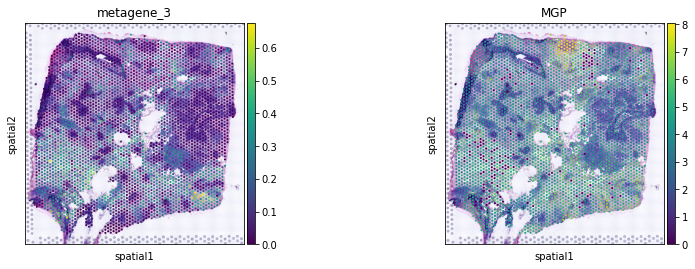

In [25]:
sc.pl.spatial(a, color=['metagene_3', 'MGP'])

In [20]:
for g in metagene_df.sort_values('metagene_9', ascending=False).index[:20]: print(g)

COL1A1
FBLN2
ACTA2
COL1A2
ELN
THBS2
COL3A1
FSTL1
COL5A1
MGP
SPARC
TAGLN
COL6A2
COL4A1
IGFBP7
EFEMP1
FBN1
COL6A1
THY1
ADAMTS2


In [29]:
df = een.get_pathway_enrichment(
    metagene_df.sort_values('metagene_9', ascending=False).index[:20],
    gene_set_library='GO_Biological_Process_2021')
epl.enrichment_dotplot(df, n=20)

alt.LayerChart(...)

In [21]:
for g in metagene_df.sort_values('metagene_8', ascending=False).index[:20]: print(g)

S100A6
RPLP1
RPL8
FTL
RPS15
RPL13
MIF
SERF2
RPS2
RPL18A
RPL10
TMSB10
RPL18
KRT8
RPL28
FAU
RPL35
RPS19
RPL36
RPS3


In [22]:
for g in metagene_df.sort_values('metagene_11', ascending=False).index[:30]: print(g)

IGLC2
IGLC3
IGKC
IGHG1
IGLC1
IGHA1
IGHG4
IGHG3
IGHG2
IGHA2
JCHAIN
IGHM
C7
MZB1
C3
SSR4
DCN
FBLN1
PTGDS
MGP
DERL3
FOS
RNASE1
GPX3
FOSB
SERPINF1
XBP1
EGR1
GAS6
MFAP4


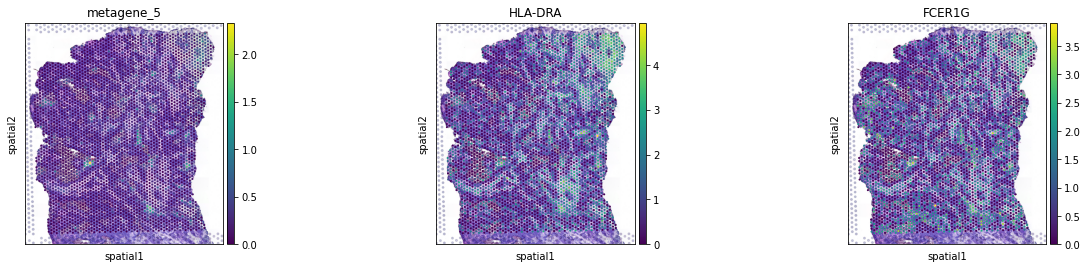

In [32]:
sc.pl.spatial(a, color=['metagene_5', 'HLA-DRA', 'FCER1G'])

In [68]:
df = een.get_pathway_enrichment(
    metagene_df.sort_values('metagene_5', ascending=False).index[:20],
    gene_set_library='PanglaoDB_Augmented_2021')
epl.enrichment_dotplot(df, n=20)

alt.LayerChart(...)

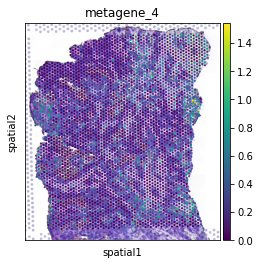

In [39]:
sc.pl.spatial(a, color=['metagene_4'])

In [37]:
for g in metagene_df.sort_values('metagene_4', ascending=False).index[:30]: print(g)

PLA2G2A
H19
EEF1A1
GSTP1
CKB
MDK
RPL21
SNHG29
HSP90AB1
SAA2
TPT1
ACTB
SAA1
KRT8
LDHB
RPL37A
PFN1
KRT18
RPS12
FN1
RPL39
GAPDH
HMGA1
HSP90AA1
GPRC5A
SLC2A1
TMSB10
TPI1
AC007952.4
HNRNPA1


In [67]:
df = een.get_pathway_enrichment(
    metagene_df.sort_values('metagene_4', ascending=False).index[:20],
    gene_set_library='BioPlanet_2019')
epl.enrichment_dotplot(df, n=20)

alt.LayerChart(...)

In [25]:
metagene_df.sort_values('metagene_5', ascending=False).index[:30].to_list()

['TYROBP',
 'HLA-DRA',
 'SPP1',
 'LAPTM5',
 'C1QB',
 'FCER1G',
 'GPNMB',
 'FCGR3A',
 'RGS1',
 'HLA-DPA1',
 'ITGB2',
 'C1QC',
 'HLA-DPB1',
 'IFI30',
 'SRGN',
 'APOC1',
 'CD68',
 'HLA-DRB1',
 'C1QA',
 'LYZ',
 'APOE',
 'HLA-DQB1',
 'CTSB',
 'HLA-DQA1',
 'CD74',
 'AIF1',
 'FCGR2A',
 'CD14',
 'S100A9',
 'CTSS']

In [34]:
for g in metagene_df.sort_values('metagene_1', ascending=False).index[:30]: print(g)

NDRG1
VEGFA
DDIT4
SLC2A1
NDUFA4L2
ERRFI1
DNAJB1
HSPA1A
SPP1
DDIT3
HSPA1B
P4HA1
SPINK1
BNIP3
NT5C3A
ENO2
JUN
NUPR1
TGFBI
ERO1A
BNIP3L
H19
TM4SF1
ADM
SERPINA1
SH3GLB1
ZFP36
BHLHE40
PPP1R15A
WSB1


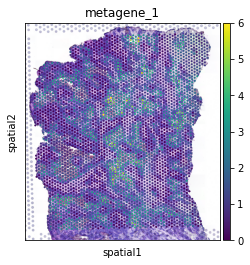

In [36]:
sc.pl.spatial(a, color=['metagene_1'])

In [63]:
df = een.get_pathway_enrichment(
    metagene_df.sort_values('metagene_3', ascending=False).index[:20],
    gene_set_library='PanglaoDB_Augmented_2021')
epl.enrichment_dotplot(df, n=20)

alt.LayerChart(...)

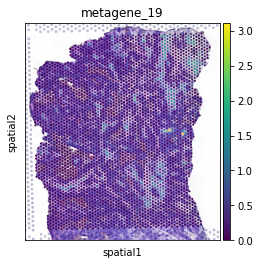

In [56]:
sc.pl.spatial(a, color=['metagene_19'])

In [58]:
df = een.get_pathway_enrichment(
    metagene_df.sort_values('metagene_19', ascending=False).index[:20],
    gene_set_library='GO_Biological_Process_2021')
epl.enrichment_dotplot(df, n=50)

alt.LayerChart(...)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = pd.DataFrame(data=scaler.fit_transform(metagene_df.values),
                      index=metagene_df.index, columns=metagene_df.columns).transpose()
scaled

gene         LINC01128    SAMD11     NOC2L    KLHL17      HES4     ISG15  \
metagene_0   -0.529227 -0.278423  0.111498 -0.507432  1.219384 -0.772584   
metagene_1   -0.230566 -0.862686  0.090706 -0.128469  0.416163 -0.672861   
metagene_2   -0.261638 -0.583989 -0.335573 -0.583989 -0.486097  0.227373   
metagene_3   -0.302521 -0.303601 -0.303601 -0.303601 -0.283302 -0.251730   
metagene_4   -0.877084 -0.834908  0.532457 -0.147413  0.526222  0.264132   
metagene_5   -0.490384 -0.490384 -0.442673 -0.490384 -0.490384  0.909736   
metagene_6   -0.159449 -0.422581 -0.248695 -0.422581 -0.391768  1.938459   
metagene_7   -0.116478 -0.664356  0.348795 -0.502502 -0.664356 -0.664356   
metagene_8   -0.372389 -0.493457  1.911340  0.089362  2.979538  6.448423   
metagene_9   -0.215707  2.826416 -0.252787 -0.129021  5.704714  0.758526   
metagene_10  -0.767624 -0.836337 -0.098549 -0.836337 -0.342938  0.343721   
metagene_11  -0.265412  0.675716 -0.237253 -0.265412  0.237551 -0.265412   
metagene_12  -0.139078 -1.320218  1.298417 -0.023260  0.155138 -1.110075   
metagene_13  -0.629941  0.115164 -0.009166 -0.028720 -0.486564 -0.424772   
metagene_14  -0.488015  2.005121 -0.244400 -0.576564  1.863832  0.191750   
metagene_15  -0.563578 -0.566416  1.202933 -0.395553  1.791606  5.179319   
metagene_16  -0.204583 -0.207674 -0.084487 -0.196911 -0.276300  0.435557   
metagene_17  -0.758609 -0.775706  0.158826 -0.420825  0.431197  0.642480   
metagene_18  -0.645303 -0.601233  0.240368 -0.545133 -0.492099 -0.363504   
metagene_19  -0.491509 -0.527058  0.184644 -0.421518 -0.254976  0.355216   

gene             AGRN  C1orf159  AL390719.2   TNFRSF4  ...     MT-ND3  \
metagene_0   2.758081 -0.224309    1.968191 -0.772584  ...   0.035141   
metagene_1   0.715944 -0.779743   -0.496583 -0.862686  ...  -0.862686   
metagene_2   0.284226 -0.583972   -0.583989 -0.583989  ...   3.565993   
metagene_3  -0.303601 -0.303601   -0.303601 -0.303601  ...   9.623079   
metagene_4   0.063894 -0.454773   -0.438085 -0.899929  ...   3.433670   
metagene_5   0.359121 -0.490384   -0.490384 -0.194523  ...  -0.142735   
metagene_6  -0.422581 -0.422581   -0.422581 -0.422581  ...   9.512968   
metagene_7  -0.664356 -0.402515   -0.664356 -0.664356  ...   3.185707   
metagene_8   0.582090  0.328360    0.111615  0.288190  ...   2.487187   
metagene_9   1.690526 -0.498436   -0.498436  1.176242  ...   0.621758   
metagene_10  0.529875 -0.607906    1.299948 -0.836337  ...   4.492292   
metagene_11 -0.265412 -0.265412   -0.265412 -0.085474  ...  -0.265412   
metagene_12  0.255316  0.278485    0.560645 -1.027104  ...  -0.849310   
metagene_13  1.072500 -0.431767   -0.101765 -1.144325  ...   2.490164   
metagene_14  0.457697 -0.576564   -0.576564 -0.576564  ...  -0.576564   
metagene_15 -0.566416 -0.430185   -0.440456 -0.566416  ...   3.835212   
metagene_16 -0.276300 -0.255420   -0.276300 -0.276300  ...  11.195487   
metagene_17  0.341114 -0.051959    0.736411  0.375544  ...   4.512203   
metagene_18 -0.247152 -0.511193   -0.679197 -0.670241  ...   5.088648   
metagene_19 -0.722353 -0.432391   -0.823928  1.667363  ...   3.469948   

gene          MT-ND4L     MT-ND4    MT-ND5    MT-ND6     MT-CYB  AC011043.1  \
metagene_0   2.446168   0.615848  1.116666 -0.373530  -0.158068    0.494483   
metagene_1  -0.492941  -0.077240  0.512425 -0.862686  -0.675703   -0.862686   
metagene_2   1.278206   4.546018  2.042694 -0.583989   3.705453   -0.467831   
metagene_3   6.784174   9.879422  7.206675  0.022786   9.328820   -0.303601   
metagene_4   0.058119   3.620776  0.551739 -0.822907   2.705790   -0.558856   
metagene_5  -0.490384  -0.341485  0.053999 -0.490384  -0.490384   -0.490384   
metagene_6   5.861913   9.711442  7.007472 -0.101159   9.203527   -0.422581   
metagene_7   1.515401   3.340876  1.552857 -0.605739   3.324285   -0.664356   
metagene_8  -0.493457   3.778564 -0.493457 -0.493457   3.075433   -0.493457   
metagene_9   0.745862   0.256355  0.792257 -0.498436   0.151180   -0.498436   


In [55]:
scaled['CTLA4']

metagene_0    -0.772584
metagene_1    -0.862686
metagene_2    -0.583989
metagene_3    -0.303601
metagene_4    -0.899929
metagene_5    -0.480628
metagene_6    -0.422581
metagene_7    -0.664356
metagene_8    -0.493457
metagene_9    -0.498436
metagene_10   -0.836337
metagene_11   -0.265412
metagene_12   -0.872808
metagene_13   -1.007576
metagene_14   -0.576564
metagene_15   -0.566416
metagene_16   -0.276300
metagene_17   -0.775706
metagene_18    0.228246
metagene_19    0.264728
Name: CTLA4, dtype: float64

In [46]:
scaled.tranpose()

AttributeError: 'DataFrame' object has no attribute 'tranpose'

In [45]:
scaled.transpose().sort_values('TIGIT')

KeyError: 'TIGIT'